# <font size=6><center><b>Analise - Propensão de pagamento</b></center></font>
<br>
<font size=2><a href='https://raw.githubusercontent.com/uciml/default-of-credit-card-clients-dataset/main/UCI_Credit_Card.csv'>Download da base</a></font>

## <font size=3 color='silver'><b>Importações das bibliotecas</b></font>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

## <font size=3 color='silver'><b>Carregamento das bases</b></font>

In [ ]:
url = 'https://raw.githubusercontent.com/YuChenAmberLu/Data-Science--Credit-Card-Default/refs/heads/master/UCI_Credit_Card.csv'
df_credito = pd.read_csv(url)

## <font size=3 color='silver'><b>Analise exploratória</b></font>

In [ ]:
df_credito.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


<font size=3 color='silver'><center><b>Dicionário da base</b></center></font>
<font size=2>
<ul>
<li><font color='yellow'><b>ID:</b></font> ID do cliente.</li>
<li><font color='yellow'>LIMIT_BAL:</b></font>Valor de crédito concedido em dollar NT.</li>
<li><font color='yellow'>SEX:</b></font> Opções (1=Masculino, 2=Feminino)</li>
<li><font color='yellow'>EDUCATION:</b></font> (1=Pós graduação, 2=Graduado, 3=Ensino médio, 4=Outros, 5=Desconhecido, 6=Desconhecido)</li>
<li><font color='yellow'>MARRIAGE:</b></font> Estado civil (1=Casado, 2=Solteiro, 3=Outros)</li>
<li><font color='yellow'>AGE:</b></font> Idade</li>
<li><font color='yellow'>PAY_0:</b></font> Situação do pagamento em Setembro, 2005 (-1=Pagamento em dia, 1=Atraso de 1 mes, 2=Atraso de 2 meses ...)</li>
<li><font color='yellow'>PAY_2:</b></font> Situação do pagamento em Agosto, 2005 (Escala igual acima)
<li><font color='yellow'>PAY_3:</b></font>Situação do pagamento em Julho, 2005 (Escala igual acima)</li>
<li><font color='yellow'>PAY_4:</b></font> Situação do pagamento em Junho, 2005 (Escala igual acima)</li>
<li><font color='yellow'>PAY_5:</b></font> Situação do pagamento em Maio, 2005 (Escala igual acima)</li>
<li><font color='yellow'>PAY_6:</b></font> Situação do pagamento em Abril, 2005 (Escala igual acima)</li>
<li><font color='yellow'>BILL_AMT1:</b></font> Valor da fatura em Setembro, 2005 (NT dollar)</li>
<li><font color='yellow'>BILL_AMT2:</b></font> Valor da fatura em Agosto, 2005 (NT dollar)</li>
<li><font color='yellow'>BILL_AMT3:</b></font> Valor da fatura em Junho, 2005 (NT dollar)</li>
<li><font color='yellow'>BILL_AMT4:</b></font> Valor da fatura em Junho, 2005 (NT dollar)</li>
<li><font color='yellow'>BILL_AMT5:</b></font> Valor da fatura em Maio, 2005 (NT dollar)</li>
<li><font color='yellow'>BILL_AMT6:</b></font> Valor da fatura em Abril, 2005 (NT dollar)</li>
<li><font color='yellow'>PAY_AMT1:</b></font> Valor do pagament anterior em Setembro, 2005 (NT dollar)</li>
<li><font color='yellow'>PAY_AMT2:</b></font> Valor do pagament anterior em Agosto, 2005 (NT dollar)</li>
<li><font color='yellow'>PAY_AMT3:</b></font> Valor do pagament anterior em Julho, 2005 (NT dollar)</li>
<li><font color='yellow'>PAY_AMT4:</b></font> Valor do pagament anterior em Junho, 2005 (NT dollar)</li>
<li><font color='yellow'>PAY_AMT5:</b></font> Valor do pagament anterior em Maio, 2005 (NT dollar)</li>
<li><font color='yellow'>PAY_AMT6:</b></font> Valor do pagament anterior em Abril, 2005 (NT dollar)</li>
<li><font color='yellow'>default.payment.next.month:</b></font> Default payment (1=yes, 0=no)</li>
</ul>
</font>

In [30]:
# 2. Verificar as informações gerais do DataFrame
df_credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

### <font size=3 color='silver'><b>Analise de colunas categóricas</b></font>

In [ ]:
# Contando os valores únicos na coluna EDUCATION
df_credito['EDUCATION'].value_counts()

EDUCATION
2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: count, dtype: int64

In [ ]:
# Visão em percentual coluna EDUCATION
round(df_credito['EDUCATION'].value_counts(normalize=True) * 100,2)

EDUCATION
2    46.77
1    35.28
3    16.39
4     1.56
Name: proportion, dtype: float64

In [ ]:
# Contando os valores únicos na coluna MARRIAGE
df_credito['MARRIAGE'].value_counts()

MARRIAGE
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64

In [ ]:
# Visão em percentual coluna MARRIAGE
round(df_credito['MARRIAGE'].value_counts(normalize=True) * 100,2)

MARRIAGE
2    53.21
1    45.53
3     1.26
Name: proportion, dtype: float64

In [ ]:
# Contando os valores únicos na coluna MARRIAGE
df_credito['SEX'].value_counts()

SEX
2    18112
1    11888
Name: count, dtype: int64

In [51]:
# Contando os valores únicos na coluna MARRIAGE
round(df_credito['SEX'].value_counts(normalize=True) * 100,2)

SEX
2    60.37
1    39.63
Name: proportion, dtype: float64

<font size=2 color='silver'><b>Primeiras analises</b>
<ul>
<li>Verificada as primeiras 5 linhas.</li>
<li><b> Dados Nulos:</b> Não identificada ausencia de dados</li>
</ul>
<b>Variaveis caretóricas.</b>
<ul>
<li><b>EDUCATION:</b> Identificado muitos valores com baixa representação.</li>
<li><b>MARRIAGE:</b> Identificado muitos valores com baixa representação</li>
<li><b>SEX:</b> Quantidade de categorias adequadas. Identificado que 60% dos clientes são do sexo feminino</li>
</ul>
</font>

In [ ]:
# Agrupamento dos valores de baixa representação em 4 (outros) 
df_credito['EDUCATION'] = df_credito['EDUCATION'].replace(to_replace=[0, 5, 6], value=4)

In [49]:
# Agrupando o valor não documentado de MARRIAGE (0) na categoria 3 ('Outros')
df_credito['MARRIAGE'] = df_credito['MARRIAGE'].replace(to_replace=0, value=3)

### <font size=3 color='silver'><b>Analise relação</b></font>

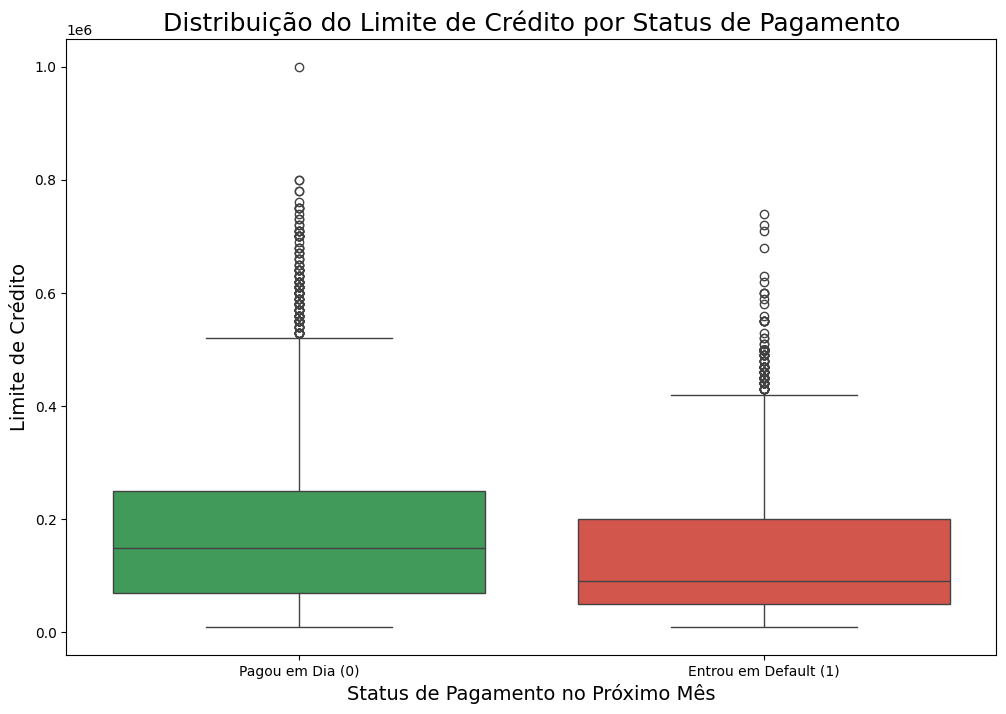

In [55]:
# --- EDA: Testando a Hipótese de LIMIT_BAL ---
plt.figure(figsize=(12, 8))

ax = sns.boxplot(data=df_credito, x='default.payment.next.month', y='LIMIT_BAL', hue='default.payment.next.month', palette=['#34A853', '#EA4335'], legend=False)

# Títulos e Rótulos
ax.set_title('Distribuição do Limite de Crédito por Status de Pagamento', fontsize=18)
ax.set_xlabel('Status de Pagamento no Próximo Mês', fontsize=14)
ax.set_ylabel('Limite de Crédito', fontsize=14)

ax.set_xticks([0, 1])
ax.set_xticklabels(['Pagou em Dia (0)', 'Entrou em Default (1)'])
plt.show()

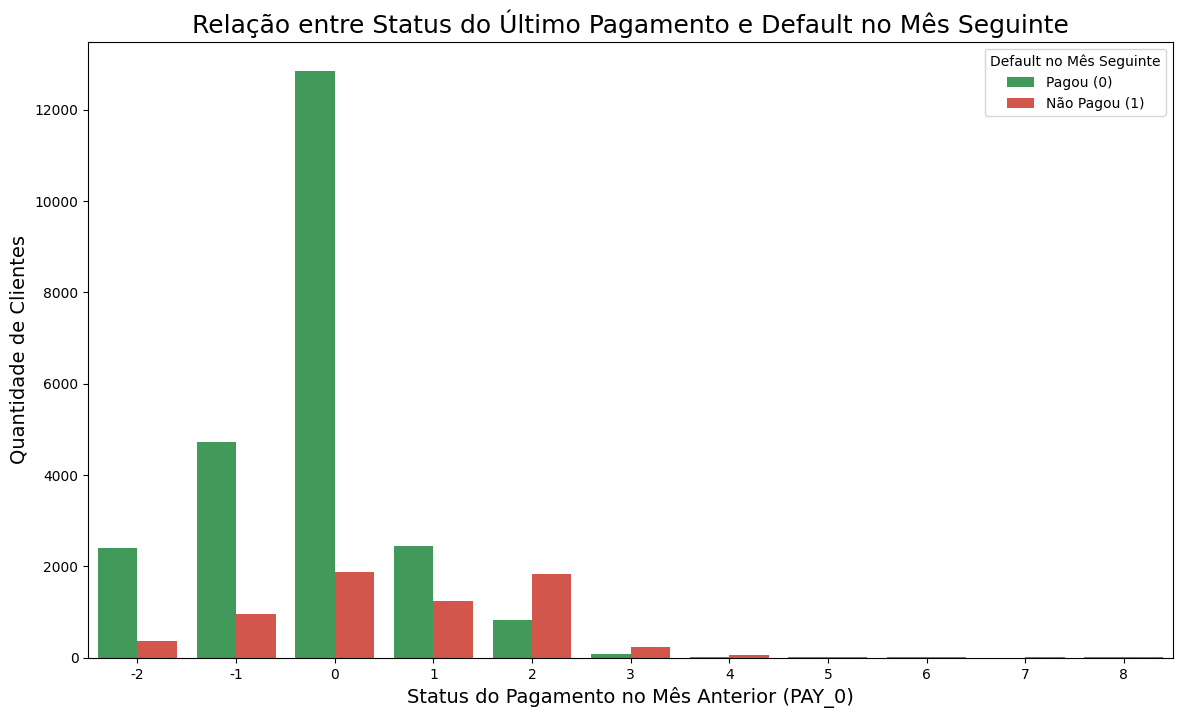

In [56]:
# --- EDA: Relação entre Histórico de Pagamento (PAY_0) e Default ---
plt.figure(figsize=(14, 8))

ax = sns.countplot(data=df_credito, x='PAY_0', hue='default.payment.next.month', palette=['#34A853', '#EA4335'])

# Títulos e Rótulos
ax.set_title('Relação entre Status do Último Pagamento e Default no Mês Seguinte', fontsize=18)
ax.set_xlabel('Status do Pagamento no Mês Anterior (PAY_0)', fontsize=14)
ax.set_ylabel('Quantidade de Clientes', fontsize=14)
ax.legend(title='Default no Mês Seguinte', labels=['Pagou (0)', 'Não Pagou (1)'])

plt.show()

## <font size=3 color='silver'><b>Modelos de Machine Learning</b></font>

## <font size=3 color='silver'><b>Separação das bases de treino e teste.</b></font>

In [41]:
# --- FASE DE MODELAGEM: PREPARAÇÃO E DIVISÃO DOS DADOS ---
from sklearn.model_selection import train_test_split

print("### Iniciando a preparação dos dados para o modelo ###")

# 1. Separar as features (X) do nosso alvo (y)
# Lembre-se de remover a coluna 'ID', que é apenas um identificador e não tem valor preditivo.
X = df_credito.drop(['ID', 'default.payment.next.month'], axis=1)
y = df_credito['default.payment.next.month']

# 2. Divisão em Treino e Teste (80% para treino, 20% para teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Usamos stratify=y para garantir que a proporção de 'pagadores' e 'não pagadores' seja a mesma
# tanto no conjunto de treino quanto no de teste. É uma boa prática para dados desbalanceados.


# 3. Verificar o resultado da separação
print("\nDivisão concluída com sucesso!")
print("Formato dos dados de treino (X_train):", X_train.shape)
print("Formato dos dados de teste (X_test):", X_test.shape)
print("\nProporção do alvo no treino:\n", y_train.value_counts(normalize=True))
print("\nProporção do alvo no teste:\n", y_test.value_counts(normalize=True))

### Iniciando a preparação dos dados para o modelo ###

Divisão concluída com sucesso!
Formato dos dados de treino (X_train): (24000, 23)
Formato dos dados de teste (X_test): (6000, 23)

Proporção do alvo no treino:
 default.payment.next.month
0    0.778792
1    0.221208
Name: proportion, dtype: float64

Proporção do alvo no teste:
 default.payment.next.month
0    0.778833
1    0.221167
Name: proportion, dtype: float64


## <font size=3 color='silver'><b>V1 - Logistic Refression.</b></font>

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [60]:
# 1. Fazendo as previsões nos dados de teste
y_pred = model_lr.predict(X_test_scaled)

# 2. Avaliando a Acurácia Geral
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo: {accuracy * 100:.2f}%")

# 3. Visualizando a Matriz de Confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# 4. Vendo o Relatório de Classificação completo
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Pagou (0)', 'Default (1)']))

print("\n--- AVALIAÇÃO CONCLUÍDA ---")


Acurácia do modelo: 80.83%

Matriz de Confusão:
[[4529  144]
 [1006  321]]

Relatório de Classificação:
              precision    recall  f1-score   support

   Pagou (0)       0.82      0.97      0.89      4673
 Default (1)       0.69      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.61      0.62      6000
weighted avg       0.79      0.81      0.77      6000


--- AVALIAÇÃO CONCLUÍDA ---


## <font size=3 color='silver'><b>V2 - Random Forest Classifier.</b></font>

In [61]:
# 1. Criação do Modelo RandomForest
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1)

# 2. Treinamento do Modelo
model_rf.fit(X_train_scaled, y_train)
print("\n--- MODELO 'RADAR DE PAGADORES' (V2) TREINADO COM SUCESSO! ---")

# 3. Avaliando a Acurácia Geral
print("\n### Avaliando o Modelo V2: RandomForest ###")

# 4. Fazendo as previsões nos dados de teste
y_pred_rf = model_rf.predict(X_test_scaled)

# 5.Imprimindo o relatório completo
print("\nRelatório de Classificação (RandomForest V2):")
print(classification_report(y_test, y_pred_rf, target_names=['Pagou (0)', 'Default (1)']))

print("\nMatriz de Confusão (RandomForest V2):")
print(confusion_matrix(y_test, y_pred_rf))


--- MODELO 'RADAR DE PAGADORES' (V2) TREINADO COM SUCESSO! ---

### Avaliando o Modelo V2: RandomForest ###

Relatório de Classificação (RandomForest V2):
              precision    recall  f1-score   support

   Pagou (0)       0.84      0.95      0.89      4673
 Default (1)       0.64      0.34      0.45      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.64      0.67      6000
weighted avg       0.79      0.81      0.79      6000


Matriz de Confusão (RandomForest V2):
[[4421  252]
 [ 872  455]]


## <font size=3 color='silver'><b>V2.1 - Random Forest Classifier + Hiperparametro max_depth.</b></font>

In [ ]:
# 1. Instanciando 
model_rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', n_jobs=-1, max_depth=10)

# 2. Treinamento do Modelo
model_rf.fit(X_train_scaled, y_train)
print("\n--- MODELO 'RADAR DE PAGADORES' (V2.1) TREINADO COM SUCESSO! ---")

# 3. Avaliando a Acurácia Geral
print("\n### Avaliando o Modelo V2.1: RandomForest ###")

# 4. Fazendo as previsões nos dados de teste
y_pred_rf = model_rf.predict(X_test_scaled)

# 5.Imprimindo o relatório completo
print("\nRelatório de Classificação (RandomForest V2.1):")
print(classification_report(y_test, y_pred_rf, target_names=['Pagou (0)', 'Default (1)']))

print("\nMatriz de Confusão (RandomForest V2.1):")
print(confusion_matrix(y_test, y_pred_rf))


--- MODELO 'RADAR DE PAGADORES' (V2.1) TREINADO COM SUCESSO! ---

### Avaliando o Modelo V2.1: RandomForest ###

Relatório de Classificação (RandomForest V2.1):
              precision    recall  f1-score   support

   Pagou (0)       0.87      0.85      0.86      4673
 Default (1)       0.52      0.56      0.54      1327

    accuracy                           0.79      6000
   macro avg       0.70      0.71      0.70      6000
weighted avg       0.79      0.79      0.79      6000


Matriz de Confusão (RandomForest V2.1):
[[3993  680]
 [ 586  741]]


## <font size=3 color='silver'><b>V3 - GRADIENT BOOSTING.</b></font>

In [65]:
# 1. Padronização das Features (Scaling)
scaler = StandardScaler()
X_train_scaled_np = scaler.fit_transform(X_train)
X_test_scaled_np = scaler.transform(X_test)

# --- A CORREÇÃO ESTÁ AQUI ---
# Convertendo os arrays NumPy de volta para DataFrames, preservando os nomes das colunas
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled_np, columns=X_test.columns)
print("Dados padronizados e nomes das features preservados.")


# 2. Criação do Modelo LightGBM
ratio = y_train.value_counts()[0] / y_train.value_counts()[1]
model_lgbm = lgb.LGBMClassifier(random_state=42, n_jobs=-1, scale_pos_weight=ratio)

# 3. Treinamento do Modelo
model_lgbm.fit(X_train_scaled, y_train)
print("\n--- MODELO V3 TREINADO COM SUCESSO! ---")


# 4. Avaliação do Modelo V3
print("\n### Avaliando o Modelo V3: LightGBM ###")
y_pred_lgbm = model_lgbm.predict(X_test_scaled)

print("\nRelatório de Classificação (LightGBM V3):")
print(classification_report(y_test, y_pred_lgbm, target_names=['Pagou (0)', 'Default (1)']))

print("\nMatriz de Confusão (LightGBM V3):")
print(confusion_matrix(y_test, y_pred_lgbm))

Dados padronizados e nomes das features preservados.
[LightGBM] [Info] Number of positive: 5309, number of negative: 18691
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0,001869 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3268
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,221208 -> initscore=-1,258639
[LightGBM] [Info] Start training from score -1,258639

--- MODELO V3 TREINADO COM SUCESSO! ---

### Avaliando o Modelo V3: LightGBM ###

Relatório de Classificação (LightGBM V3):
              precision    recall  f1-score   support

   Pagou (0)       0.88      0.80      0.84      4673
 Default (1)       0.47      0.62      0.54      1327

    accuracy                           0.76      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.76      0.77      6000


M

## <center><font size=6><b> Resultados finais dos modelos testados</b></font></center>
<font size=3>
<center>
<style>
    .dark-table {
        border-collapse: collapse;
        margin: 25px 0;
        font-size: 0.9em;
        font-family: sans-serif;
        min-width: 400px;
        box-shadow: 0 0 20px rgba(0, 0, 0, 0.25);
        color: #ffffff; /* Cor do texto principal */
    }
    .dark-table thead tr {
        background-color: #343a40; /* Cabeçalho mais escuro */
        color: #ffffff;
        text-align: center;
    }
    .dark-table th,
    .dark-table td {
        padding: 12px 15px;
        text-align: center;
    }
    .dark-table tbody tr {
        background-color: #495057; /* Fundo das linhas */
        border-bottom: 1px solid #6c757d; /* Borda sutil entre linhas */
    }
    .dark-table tbody tr:last-of-type {
        border-bottom: 2px solid #17a2b8; /* Borda final destacada */
    }
    .highlight-green {
        background-color: #28a745 !important; /* Verde mais forte para o sucesso */
        font-weight: bold;
    }
    .highlight-red {
        background-color: #dc3545 !important; /* Vermelho para o ponto de atenção/custo */
        font-weight: bold;
    }
</style>

<table class="dark-table">
    <thead>
        <tr>
            <th>Modelo</th>
            <th>Recall (Default)</th>
            <th>Precision (Default)</th>
            <th>F1-Score (Default)</th>
            <th>Acurácia</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>V1: Regressão Logística</td>
            <td>0.24 (24%)</td>
            <td>0.69 (69%)</td>
            <td>0.36</td>
            <td>81%</td>
        </tr>
        <tr>
            <td>V2: RandomForest (max_depth=10)</td>
            <td>0.34 (34%)</td>
            <td>0.64 (64%)</td>
            <td>0.45</td>
            <td>81%</td>
        </tr>
         <tr>
            <td>V2.1: RandomForest (seu ajuste)</td>
            <td>0.56 (56%)</td>
            <td>0.52 (52%)</td>
            <td>0.54</td>
            <td>79%</td>
        </tr>
        <tr>
            <td><b>V3: LightGBM (Campeão)</b></td>
            <td class="highlight-green">0.62 (62%)</td>
            <td class="highlight-red">0.47 (47%)</td>
            <td style="font-weight: bold;">0.54</td>
            <td>76%</td>
        </tr>
    </tbody>
</table>
</font>